Hypothesis testing can be done using a multitude of method, they follow a similar pathway

**Prepare**: Identify the parameters of interest, list hypothesis, identify the significance level and identify p and n

**Check**: Verify conditions to ensure p is normal under null hypothesis 

**Calculate**: If conditions hold compute standard error, z-score and identify p value

**Conclude**: Evalute hypothesis

We utilise the computational ability of python to calculate to a much higher degree of accurary a conclusion to our hypothesis test. We use a certain python libray exectuion to test, and the test in it self is linked to the hypothesis.

We know that Cobb angles are the quantifaction of spinal deformity. These can be valued as on the most important values of the paper. In this code we perform some important analysis on them.
- Initially the important libraries and modules are called
- Then we create variable arrays for the Cobb angles
- Plot histograms to visually inspect
- Do a stat test to mathematically determine important values 
- Link to null hypotheses
- Plot further
- Derive values and link to hypothesis

Once we have the values we can use these to test the null hypotheses.
Due to the nature of the test, an appropriate null hypothesis would be:

> The severity of scoliosis in children is not normally distributed, whether pre or post surgery.

With the Alternate hypothesis:

> Scoliosis severity in children follows the normal distribution


In [2]:
# Import the relevant modules and libraries 
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
from scipy.stats import anderson
import prettytable
from prettytable import PrettyTable

# Now the dataframe needs to be imported and defined
df = pd.read_csv('Table2extract.csv')     
df.head() # print the first few rows of the table to verify proper importing
# we can see the output below


,ID,Age at Prior Fusion (mo),Age at VEPTR (yr),Age at Last Follow-up CT (yr),Length of Follow-up(yr),Cobb Angle Preoperative,Cobb angle Postoperative,Cobb Angle Last,Thoracic Spine Length (cm) Pre Operative,Thoracic Spine Length (cm) Postoperative,Thoracic Spine Length (cm) Last,Change in Thoracic Spine Length After Initial VEPTR (cm) [last postoperative (cm)],Grovvth/Year Thoracic Spine After Initial Operation (cm) [last — postoperative/ yr (crVyr)]
0,a,NaN,2.1,7.3,5.2,47.0,29.0,29.0,12.3,15.3,20.7,5.4,1.0
1,b,NaN,9.9,14.7,4.8,30.0,20.0,32.0,NaN,21.1,26.1,5.0,1.0
2,c,NaN,1.2,5.2,4.0,49.0,47.0,49.0,107.0,12.2,16.0,38.0,1.0
3,d,NaN,3.4,8.8,5.4,34.0,49.0,49.0,NaN,NaN,21.2,NaN,NaN
4,e,NaN,1.0,5.7,4.7,33.0,12.0,16.0,105.0,10.1,13.9,3.8,8.0


We now extrect the PRE and POSTOP

In [3]:
# convert variable df into a datafram
df = pd.DataFrame(df)

#extract 
ID = list(df.iloc[:,0])
PREOP = list(df.iloc[:,5])
POSTOP = list(df.iloc[:,6])
LAST = list(df.iloc[:,7])
# var = allvars at the dataframe location all rows , N collumn


First we plot histograms of each of the cobb angles PRE and POSTOP 
For ease of comparison we can plot them ontop of each other

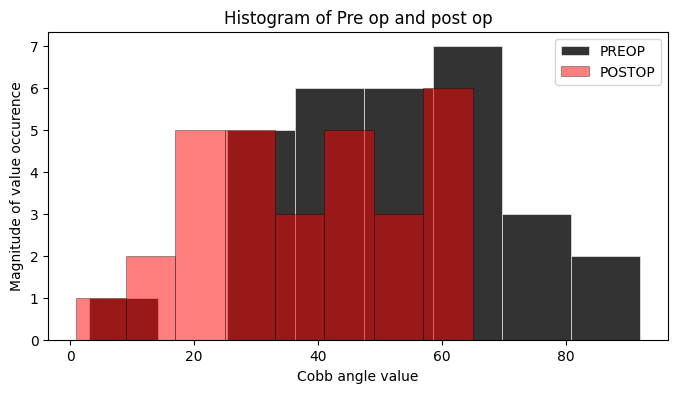

In [4]:
# Determine plot size var for use in fig code
plot_size = (8,4)

# create a figure and determine axis using subplot
fig, ax = pp.subplots(figsize=plot_size)
# set the background color
ax.set_facecolor('xkcd:white')

# create a histogram of the PREOP and POSTOP var
ax.hist(PREOP, bins=8, linewidth=0.5, edgecolor="white", alpha = 0.8, color='black', label= 'PREOP')
ax.hist(POSTOP, bins=8, linewidth=0.5, edgecolor="black", alpha = 0.5, color='red', label= 'POSTOP')
# bins determines the number of bins (value groups) and all other determine the visual appearance of the graph

# Add in plot info - title and labels
ax.set_xlabel('Cobb angle value')
ax.set_ylabel('Magnitude of value occurence')
ax.set_title('Histogram of Pre op and post op')

# legend
ax.legend()

# print the stored matplotlib figures
pp.show()

Initial visual analysis appears to show some comformitt to the normal distribution, although with some skewing. But to be more precise we can find this mathematically.

A good way to check wether an array follows a distributional law is to peform the Anderson-darling test which is a test of exactly that. The code would print false if a distribution is found. This computation requires that there is no NaN values and we can see from out histogram and from out header function output that there is some NaN values

In [5]:

# Create cleaned vars
PREOP_clean = np.array(PREOP)
POSTOP_clean = np.array(POSTOP)

# Remove NaN values - test will fail upon encountering NaN value
PREOP_clean = PREOP_clean[~np.isnan(PREOP_clean)]
POSTOP_clean = POSTOP_clean[~np.isnan(POSTOP_clean)]

# Perform anderson stat test
resultPOSTOP = anderson(POSTOP_clean, dist='norm')
resultPREOP= anderson(PREOP_clean, dist='norm')

#print of the results from PREOP anderson
print("Preop Anderson") # Identifying help
print(resultPOSTOP)

#seperate values by a new line
print("\n")

#print of the result from POSTOP anderson
print("Postop Anderson")
print(resultPREOP)


Preop Anderson
AndersonResult(statistic=0.39822404755500784, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=37.733333333333334, scale=18.08778085039605)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


Postop Anderson
AndersonResult(statistic=0.3025404704701131, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=52.93333333333333, scale=18.654634874444756)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


The anderson darling (AD) test ouputs some numbers
- Statistic - AD test result, determines how well it fits distribution, smaller the value the closer the fit
- Critical Values - linked to statistic and is used to verify null hypothesis, if the statistic is larger than critical value you may reject the null hypothesis 
- Significance level - Correlates to critical values, value is the probability that you should reject null hypothesis, the lower this value is the more compelling the results are
- fit result - shows the most optimal distribution parameters that fit the data and is linked with fit param
- fit param - location and scale of the fit line
- success - status of anderson calculation 

To ease visualistion of numbers we can print these out individually and insert into a table

In [6]:
# Initialse a table function and map to var (table) using prettytable python library
table = PrettyTable()

# Define the table title names
table.field_names = ["Dataset", "Statistic", "Critical Value", "Significance levels","Success"]

# Due to the nature of the success criteria we need to calculate
# The block below check whether the test statistic is greater than the critical value at a significance level of 5%
def successcheck(statistic, critical_values):
    return "Yes" if statistic <= critical_values[2] else "No"
    # [2] defines sig. level


# Add a new row and then print the values from the test into it + print the value from the calculation above
table.add_row(["resultPOSTOP",resultPOSTOP.statistic, resultPOSTOP.critical_values,resultPOSTOP.significance_level, successcheck(resultPOSTOP.statistic, resultPOSTOP.critical_values)])
table.add_row(["resultPREOP",resultPREOP.statistic, resultPREOP.critical_values,resultPREOP.significance_level, successcheck(resultPREOP.statistic, resultPOSTOP.critical_values)])

# Display the table
print(table)


+--------------+---------------------+---------------------------------+----------------------------+---------+
|   Dataset    |      Statistic      |          Critical Value         |    Significance levels     | Success |
+--------------+---------------------+---------------------------------+----------------------------+---------+
| resultPOSTOP | 0.39822404755500784 | [0.521 0.593 0.712 0.83  0.988] | [15.  10.   5.   2.5  1. ] |   Yes   |
| resultPREOP  |  0.3025404704701131 | [0.521 0.593 0.712 0.83  0.988] | [15.  10.   5.   2.5  1. ] |   Yes   |
+--------------+---------------------+---------------------------------+----------------------------+---------+


Due to the results of the test we have to **reject the null hypothesis** as it is shown that the values conform to normality by the success being 'yes' 

It could be useful to further visualise the data in a different format

> we make a line graph

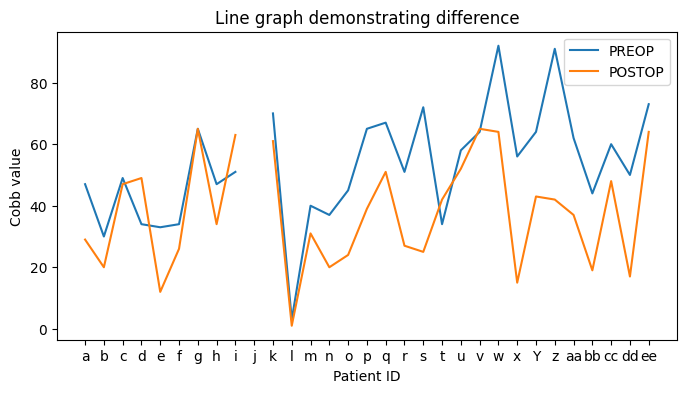

In [7]:
# determine a plot size variable
plot_size = (8, 4) 

# creates a figure and axis with the subplot function (for overlapping)
fig, ax = pp.subplots(figsize=plot_size)
# determine the colour of the graph
ax.set_facecolor('xkcd:white')

# plot, in default, the graph and also (like before) remove the NaN values to void graph error 
ax.plot(ID, [value if not np.isnan(value) else None for value in PREOP], label='PREOP')
ax.plot(ID, [value if not np.isnan(value) else None for value in POSTOP], label='POSTOP')


# Add in plot info - title and labels
ax.set_xlabel('Patient ID')
ax.set_ylabel('Cobb value')
ax.set_title('Line graph demonstrating difference')

# Add a legend to the plot
ax.legend() 

# print of the stored graphs 
pp.show()

The difference appears to be similar for a lot of the points. Importantly from this we notice that the cobb angle has actually gotten worse post surgery and this should be investigated further, although for conciseness another notebook will discuss this.